**#Distributions**
* Normal Distribution / Gaussian Distribution
* Standard Normal Distribution
* Z Score
* Log Normal Distribution
* Bernullis Distribution
* Binomail Distribution 

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np

In [ ]:
import statistics

In [ ]:
#mean, median, mode
df = sns.load_dataset('tips')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
np.mean(df["total_bill"])

19.785942622950824

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.groupby('sex')['time'].value_counts()

sex           
Male    Dinner    124
        Lunch      33
Female  Dinner     52
        Lunch      35
Name: time, dtype: int64

In [ ]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [ ]:
np.median(df['total_bill'])

17.795

In [ ]:
statistics.mode(df['total_bill'])

13.42

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


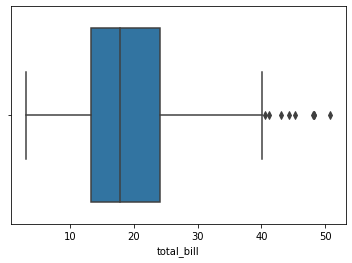

In [ ]:
sns.boxplot(df['total_bill'])

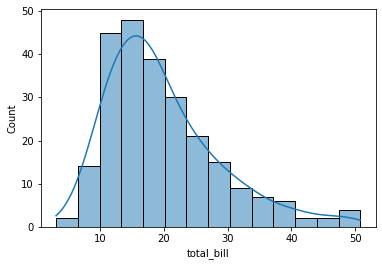

In [ ]:
sns.histplot(df['total_bill'], kde=True)

In [ ]:
df1 = sns.load_dataset('iris')

In [ ]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


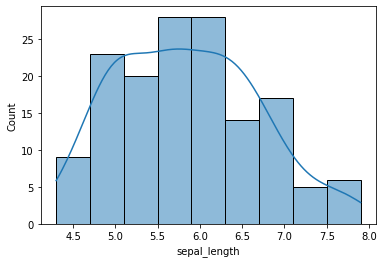

In [ ]:
sns.histplot(df1['sepal_length'], kde=True)

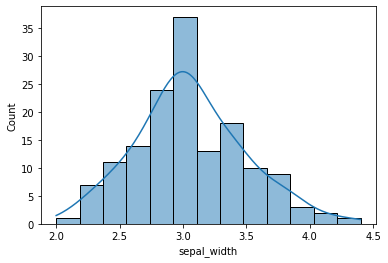

In [ ]:
sns.histplot(df1['sepal_width'], kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


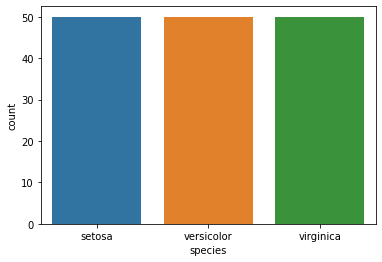

In [ ]:
sns.countplot(df1['species'])

In [ ]:
np.percentile(df1['sepal_length'],[25,99])

array([5.1, 7.7])

In [ ]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <a list of 10 Patch objects>)

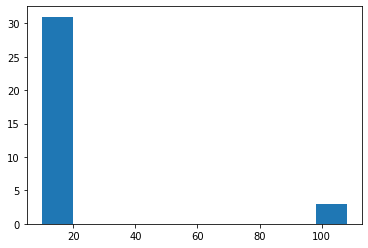

In [ ]:
plt.hist(dataset)

In [ ]:
##write function to detect outliers

outlier = []
def detect_outlier(data):
    #define threshold
    threshold = 3
    mean = np.mean(data)
    standard_deviation = np.std(data)

    for i in dataset:
        Z_score = (i - mean) / standard_deviation
        if np.abs(Z_score) > threshold:
            outlier.append(i)
    return outlier

In [ ]:
detect_outlier(dataset)

[102, 107, 108]

In [ ]:
##IQR
#1. Sort the data
#. find Q1 and Q3
#  calculate (Q3-Q1)

In [ ]:
#sort data
sorted_dataset = sorted(dataset)

sorted_dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [ ]:
Q1 = np.quantile(sorted_dataset, .25)
Q3 = np.quantile(sorted_dataset, .75)
IQR = Q3 - Q1
  
print(IQR)

3.0


In [ ]:
lower_fence = Q1 - (1.5 * IQR) 
higher_fence = Q3 + (1.5 * IQR)

In [ ]:
lower_fence, higher_fence

(7.5, 19.5)

In [ ]:
q1,q3 = np.percentile(sorted_dataset, [25,75])
print(q1,q3)

12.0 15.0


In [ ]:
Lower_fence = q1 - (1.5 * IQR) 
Higher_fence = q3 + (1.5 * IQR)

In [ ]:
lower_fence, Higher_fence

(7.5, 19.5)

In [ ]:
def low_high_fence(data):
    sorted_dataset = sorted(data)
    Q1 = np.quantile(sorted_dataset, .25)
    Q3 = np.quantile(sorted_dataset, .75)
    IQR = Q3 - Q1
    lower_fence = Q1 - (1.5 * IQR) 
    higher_fence = Q3 + (1.5 * IQR)
    return (lower_fence, higher_fence)



In [ ]:
low_high_fence(dataset)

(7.5, 19.5)

##Learning Curves

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
X = data["data"]
y= data["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [2]:
import matplotlib.pyplot as plt


In [5]:
from sklearn.tree import DecisionTreeRegressor

rgr = DecisionTreeRegressor(max_depth=5)
rgr.fit(X_train, y_train)
print("training R^2: {}".format(rgr.score(X_train, y_train)))
print("training R^2: {}".format(rgr.score(X_test, y_test)))

training R^2: 0.6310818756253012
training R^2: 0.5968627941966695


In [10]:
rgr = DecisionTreeRegressor(max_depth=5)
error_test = []
error_train = []

for n in range(50, X_train.shape[0], 50):
    X_batch = X_train[:n, :]
    y_batch = y_train[:n]

    rgr.fit(X_batch , y_batch)
    error_test.append(1-rgr.score(X_test, y_test))
    error_train.append(1-rgr.score(X_batch, y_batch))

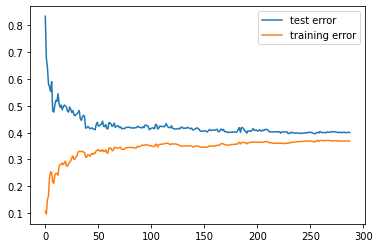

In [11]:
plt.plot(error_test)
plt.plot(error_train)
plt.legend(["test error", "training error"])
plt.show()

##*KNN* **bold text**
#Decision Boundary

In [17]:
from ipywidgets import interact, IntSlider
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


data = load_iris()
X = data['data']
y = data['target']

Xt = StandardScaler().fit_transform(X)


def plot_neighbors(n_neighbors=1):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(Xt[:, 2:], y)

    X1, X2 = np.meshgrid(np.linspace(-2,2), np.linspace(-2,2))
    y_pred = knn.predict(np.hstack((X1.reshape(-1,1), X2.reshape(-1,1))))
    plt.contourf(X1, X2, y_pred.reshape(50,50)/2, cmap='viridis', alpha=0.25, vmin=0, vmax=0.95)

    plt.scatter(*Xt[:, 2:].T, c=y, cmap='viridis');

interact(plot_neighbors, n_neighbors=IntSlider(min=1, max=36, step=2, description='neighbors'))

interactive(children=(IntSlider(value=1, description='neighbors', max=36, min=1, step=2), Output()), _dom_clas…

<function __main__.plot_neighbors>